# EDA on Google Play Store Data

### importing libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('data.csv')


### let's look at the dataset

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
#set option for the max rows and cols
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(f'the name of columns are :{df.columns}')

the name of columns are :Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
df.shape

(10841, 13)

In [7]:
print(f'the number of rows are  :{df.shape[0]} \nthe number of columns are  :{df.shape[1]} ')

the number of rows are  :10841 
the number of columns are  :13 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
### Observation
1."varies with device"

2.M

3.k

---

In [10]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
df['Size'].isnull().sum()

0

no null values in Size column we are good to go..

verify the number of values and types of values

In [12]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [13]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [14]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [15]:
#let's define a function
def convert_size(size):
    if isinstance(size,str):
        if 'k'in size:
            return float (size.replace('k',""))*1024
        elif 'M' in size:
            return float(size.replace('M',""))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size
    
    

In [16]:
df['Size']=df['Size'].apply(convert_size)

In [17]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

### now changing the name to size_in_bytes

In [18]:
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [20]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [21]:
df['Size_in_MB']=df['Size_in_bytes'].apply(lambda x : x/(1024*1024))

In [22]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


In [23]:
df['Size_in_KB']=df['Size_in_bytes'].apply(lambda x : x/(1024))

In [24]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


### Now we will work on 'Installs' column 


In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

### now we will check the values

In [26]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

### is there any null values inside Installs?

In [27]:
df['Installs'].isnull().sum()

0

### the only change we need to do is to remove:
1. '+' sign in the values.
2. ',' in the values.
3. convert the datatype into 'int'.


In [28]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x)
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


In [29]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',',"") if ',' in str(x) else x)
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


In [30]:
df['Installs']=df['Installs'].astype(int)

In [31]:
df['Installs'].describe()

count    1.084100e+04
mean     1.546291e+07
std      8.502557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### now working on 'Price' column

In [32]:
df['Price'].value_counts()

Price
0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.9

### lets see how many values have '$' sign

In [33]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [34]:
df['Price']=df['Price'].apply(lambda x: x.replace('$',"") if '$' in str(x) else x)


In [35]:
df['Price'].value_counts()

Price
0          10041
0.99         148
2.99         129
1.99          73
4.99          72
3.99          63
1.49          46
5.99          30
2.49          26
9.99          21
6.99          13
399.99        12
14.99         11
4.49           9
29.99          7
24.99          7
3.49           7
7.99           7
5.49           6
19.99          6
11.99          5
6.49           5
12.99          5
8.99           5
10.00          3
16.99          3
1.00           3
2.00           3
13.99          2
8.49           2
17.99          2
1.70           2
3.95           2
79.99          2
7.49           2
9.00           2
10.99          2
39.99          2
33.99          2
1.96           1
19.40          1
4.80           1
3.28           1
4.59           1
15.46          1
3.04           1
4.29           1
2.60           1
2.59           1
3.90           1
154.99         1
4.60           1
28.99          1
2.95           1
2.90           1
1.97           1
200.00         1
89.99          1
2.56    

In [36]:
df.isnull().sum()*100/len(df)

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size_in_bytes     15.635089
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
Size_in_MB        15.635089
Size_in_KB        15.635089
dtype: float64

In [37]:
#converted the datatype from int to float
df['Price']=df['Price'].astype(float)

In [38]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_in_bytes     float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_in_MB        float64
Size_in_KB        float64
dtype: object

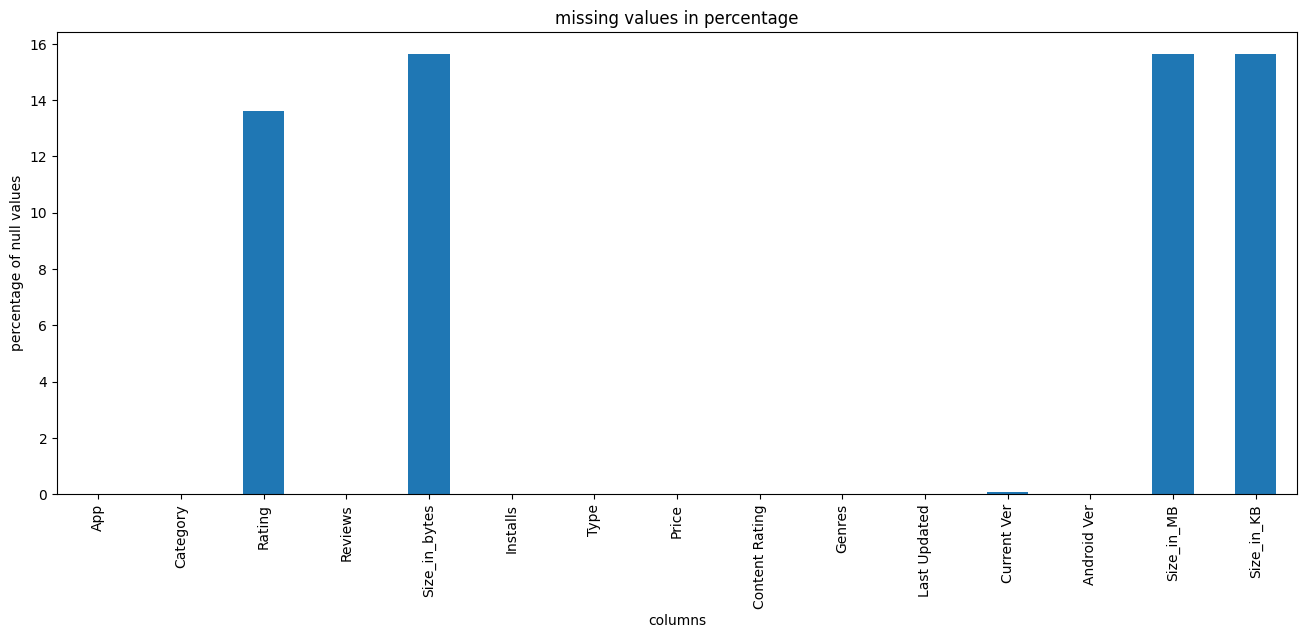

In [39]:
plt.figure(figsize=(16,6))
missing_percent=df.isnull().sum()*100/len(df)
missing_percent.plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('percentage of null values')
plt.title('missing values in percentage')
plt.show()


<Axes: >

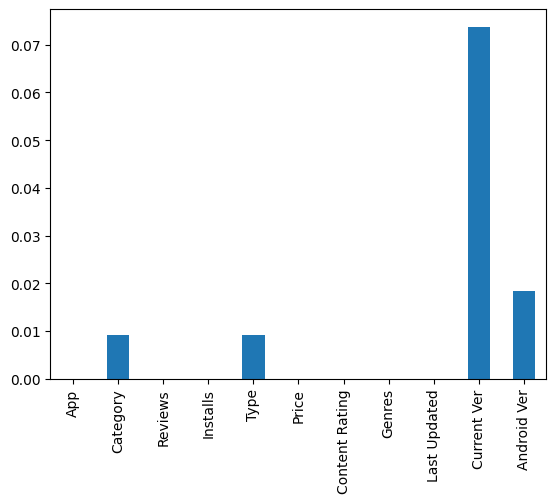

In [40]:
missing_percent[missing_percent < 1].plot(kind='bar')


<Axes: >

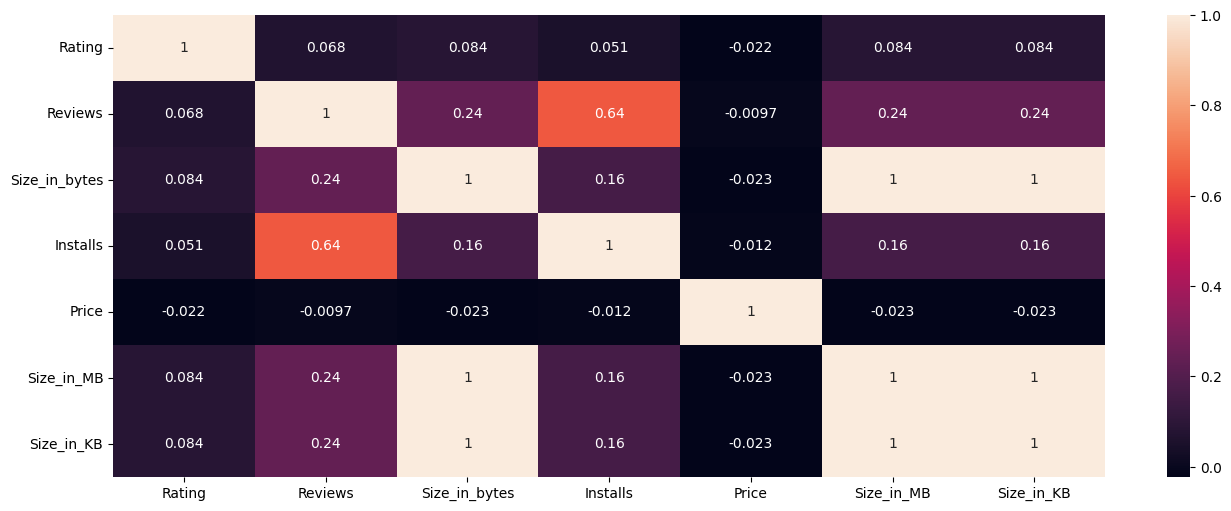

In [41]:
plt.figure(figsize=(16,6))
Numeric_cols=['Rating','Reviews','Size_in_bytes','Installs','Price','Size_in_MB','Size_in_KB']
sns.heatmap(df[Numeric_cols].corr(),annot=True)


In [42]:
df.dropna(subset=['Current Ver','Android Ver','Category','Type'],inplace=True)

In [43]:
df.isnull().sum()*100/len(df)

App                0.000000
Category           0.000000
Rating            13.565426
Reviews            0.000000
Size_in_bytes     15.643180
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.000000
Android Ver        0.000000
Size_in_MB        15.643180
Size_in_KB        15.643180
dtype: float64

In [44]:
bins=[-1,0,10,1000,10000,100000,1000000,10000000,10000000000]
labels=['no','very low','low','moderate','more than moderate','high','very high','top notch']
df['Installs_category']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [45]:
df['Installs_category'].value_counts()

Installs_category
low                   2158
high                  2116
very high             2004
more than moderate    1647
moderate              1528
top notch              828
very low               534
no                      14
Name: count, dtype: int64

In [46]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
more than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
top notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [47]:
df.isnull().sum()

App                     0
Category                0
Rating               1469
Reviews                 0
Size_in_bytes        1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Size_in_MB           1694
Size_in_KB           1694
Installs_category       0
dtype: int64

now we will calculate total no of null values in rating column 

In [48]:
df['Rating'].isnull().sum()

1469

for filling null values we need to findout what are the install_category of these null values which will help us for filling and making the data more efficient

In [49]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
low                   880
very low              453
moderate               88
more than moderate     31
no                     14
high                    3
very high               0
top notch               0
Name: count, dtype: int64

In [50]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , nan, 4.8, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Review column contains millions of reviews due to which we couldn't able to see the plot accuratly so here we just use numpy library 1og function to reduce it to between 0-1

<Axes: xlabel='Installs_category', ylabel='Reviews'>

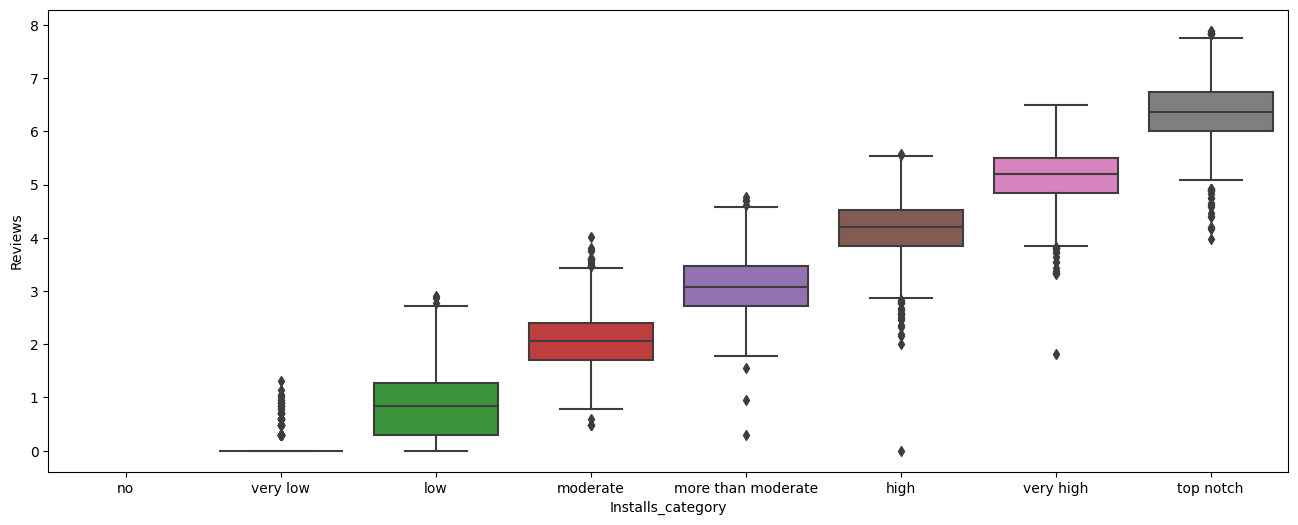

In [51]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x='Installs_category',y=np.log10(df['Reviews']))

<Axes: xlabel='Rating', ylabel='Reviews'>

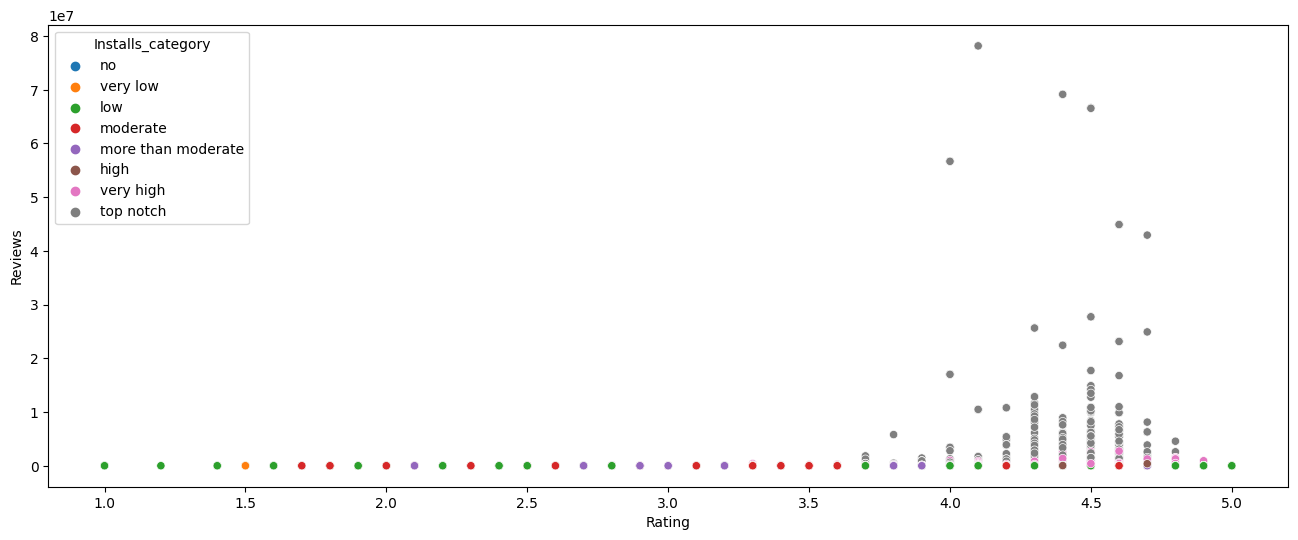

In [52]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df,x='Rating',y='Reviews',hue='Installs_category')

<Axes: xlabel='Reviews', ylabel='Installs'>

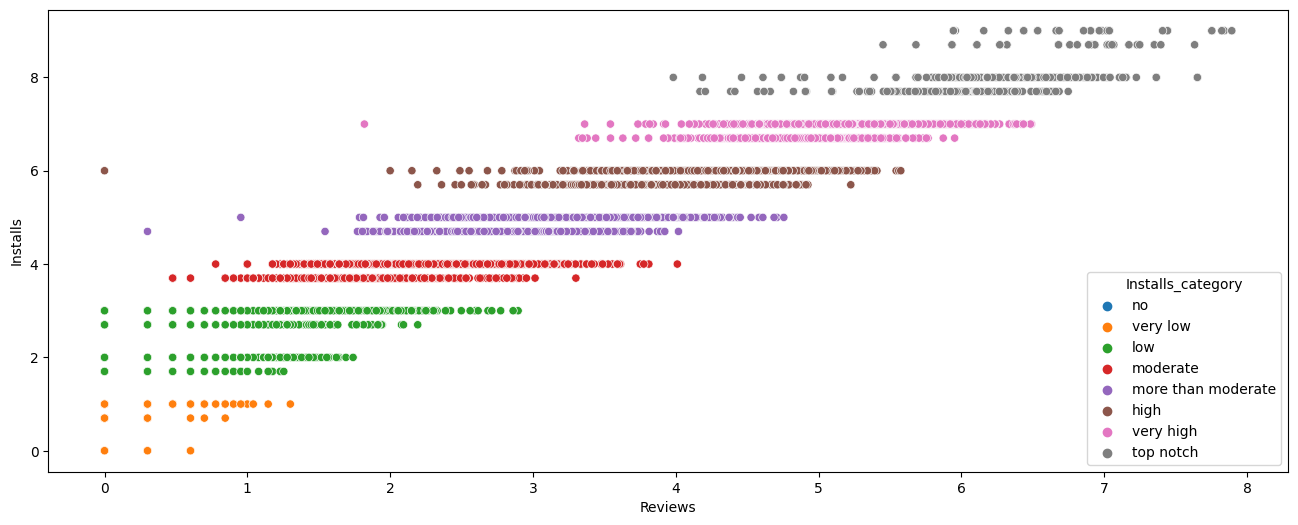

In [53]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df,x=np.log10(df['Reviews']),y=np.log10(df['Installs']),hue='Installs_category')

### now we will work on the duplicates we have to remove all the duplicates they make the dataset less efficient

In [54]:
df.duplicated().sum()

483

In [55]:
df['App'].duplicated().sum()

1181

In [56]:
for cols in df.columns:
    print(f'no of duplicates in {cols} are : {df[cols].duplicated().sum()}')

no of duplicates in App are : 1181
no of duplicates in Category are : 10796
no of duplicates in Rating are : 10789
no of duplicates in Reviews are : 4830
no of duplicates in Size_in_bytes are : 10373
no of duplicates in Installs are : 10809
no of duplicates in Type are : 10827
no of duplicates in Price are : 10737
no of duplicates in Content Rating are : 10823
no of duplicates in Genres are : 10710
no of duplicates in Last Updated are : 9453
no of duplicates in Current Ver are : 8046
no of duplicates in Android Ver are : 10796
no of duplicates in Size_in_MB are : 10373
no of duplicates in Size_in_KB are : 10373
no of duplicates in Installs_category are : 10821


In [57]:
df.duplicated().sum()

483

find and watch all the duplicates and are they real or not

In [58]:
#df[df['App'].duplicated(keep=False)].sort_values(by='App')

now we will remove all the duplicates

In [59]:
df.drop_duplicates(inplace=True)

number of rows remaining after removing duplicates

In [60]:
print(f'remaining rows after removing duplicates are : {df.shape[0]}')

remaining rows after removing duplicates are : 10346


# Insights From Data

### Which Category has the highest number of Apps?

In [61]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### which category has the highest number of Installs?

In [62]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### Which category has the highest number of reviews?

In [63]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### which category has the highest rating?

In [64]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

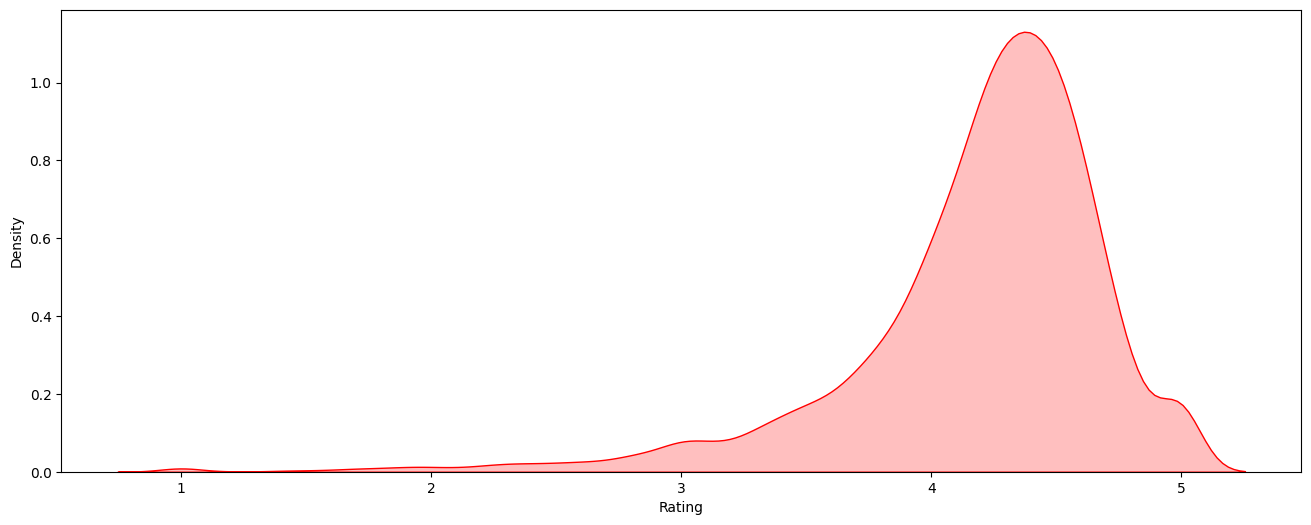

In [65]:
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'],color='red',shade=True)

free vs paid apps rating

<Axes: xlabel='Type', ylabel='Rating'>

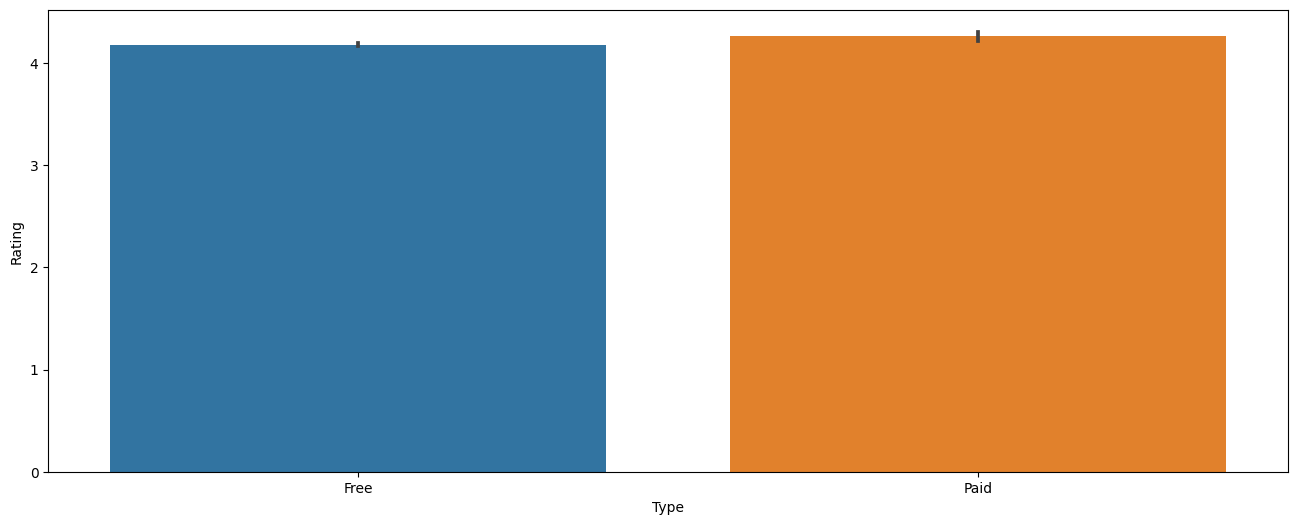

In [66]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Type',y='Rating')

In [67]:
df.groupby('Type')['Rating'].mean().sort_values(ascending=False).head(5)

Type
Paid    4.261702
Free    4.182514
Name: Rating, dtype: float64

In [68]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0,moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8,very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0,top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2,more than moderate


### which genres has the highest price

In [69]:
df.groupby('Genres')['Price'].sum().sort_values(ascending=False).head(10)

Genres
Finance            2900.83
Lifestyle          2360.87
Entertainment      1665.08
Medical            1020.69
Tools               266.26
Productivity        250.93
Education           198.98
Role Playing        181.56
Business            175.29
Personalization     149.98
Name: Price, dtype: float64

### Which genres has the highest rating

In [70]:
df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)

Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Puzzle;Education               4.600000
Adventure;Brain Games          4.600000
Strategy;Action & Adventure    4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Tools;Education                4.500000
Strategy;Education             4.500000
Name: Rating, dtype: float64

### installs category VS Size in MB

<Axes: xlabel='Installs_category', ylabel='Size_in_MB'>

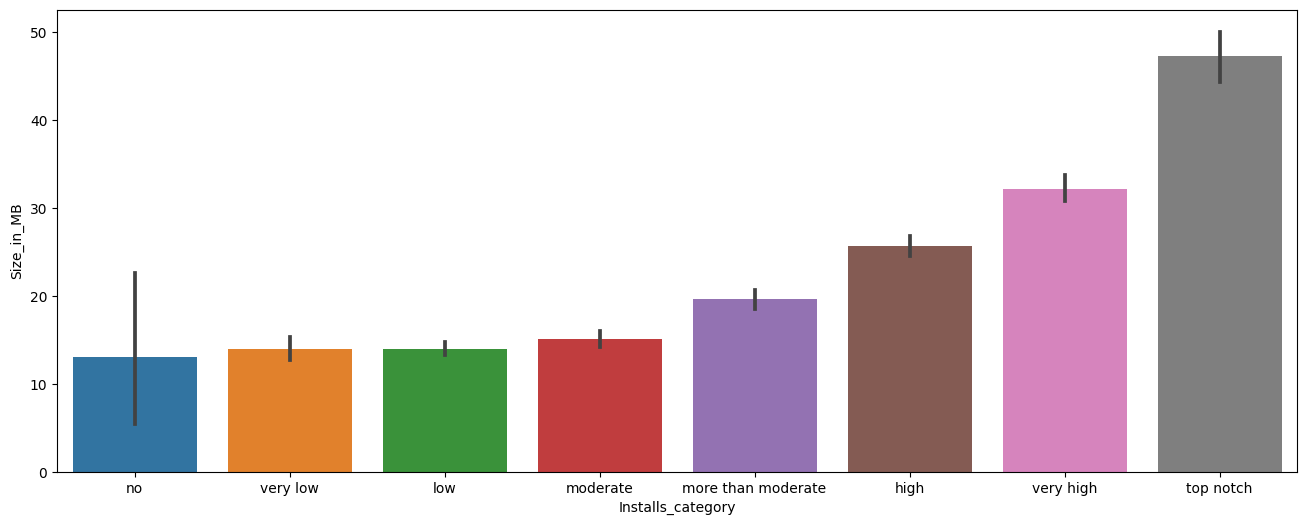

In [71]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Installs_category',y='Size_in_MB')

In [72]:
df.groupby('Genres')['Content Rating'].sum().sort_values(ascending=False).head(10)

Genres
Casino                     TeenTeenTeenTeenTeenEveryoneTeenTeenEveryoneTe...
Role Playing               TeenTeenTeenTeenMature 17+TeenTeenMature 17+Ev...
Social                     TeenTeenTeenEveryoneMature 17+EveryoneTeenEver...
Entertainment              TeenEveryoneTeenTeenEveryoneEveryoneEveryoneEv...
Video Players & Editors    TeenEveryoneEveryoneEveryoneTeenEveryoneEveryo...
Shopping                   TeenEveryoneEveryoneEveryoneEveryoneEveryoneTe...
Racing                     TeenEveryoneEveryoneEveryoneEveryoneEveryoneEv...
Lifestyle                  TeenEveryoneEveryoneEveryoneEveryoneEveryoneEv...
Books & Reference          TeenEveryoneEveryone 10+EveryoneTeenEveryoneEv...
Comics                     TeenAdults only 18+TeenEveryoneMature 17+Matur...
Name: Content Rating, dtype: object

In [73]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

### which content has the highest installs

<Axes: xlabel='Content Rating', ylabel='Installs'>

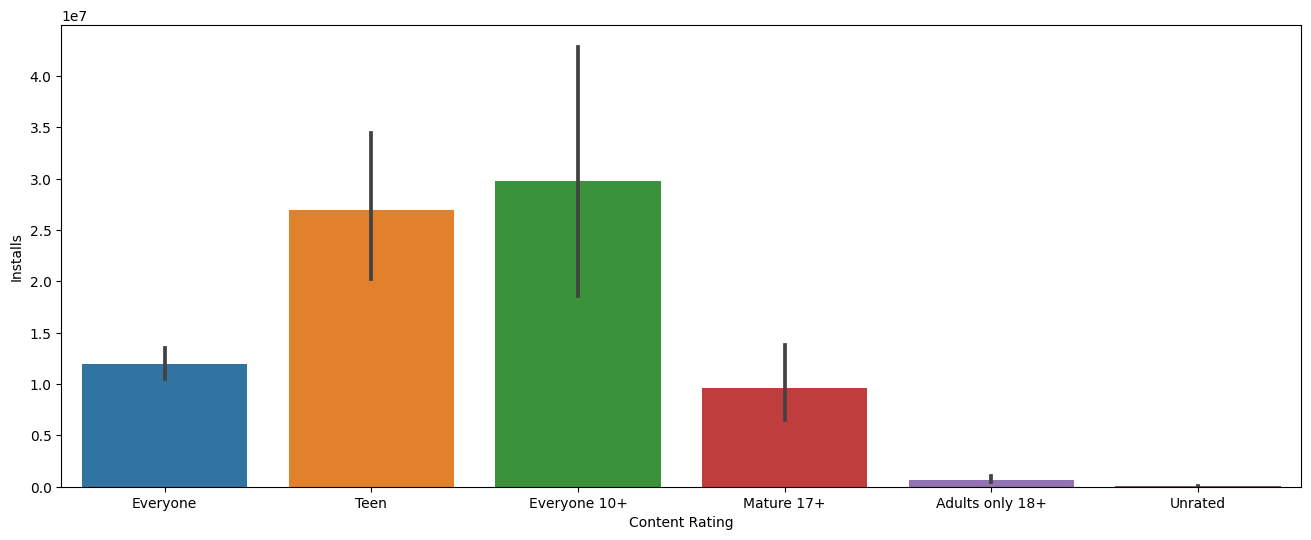

In [74]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Content Rating',y='Installs')

value counts of 'everyone' content

In [75]:
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

### top 5 paid apps in terms of ratings

<Axes: xlabel='App', ylabel='Rating'>

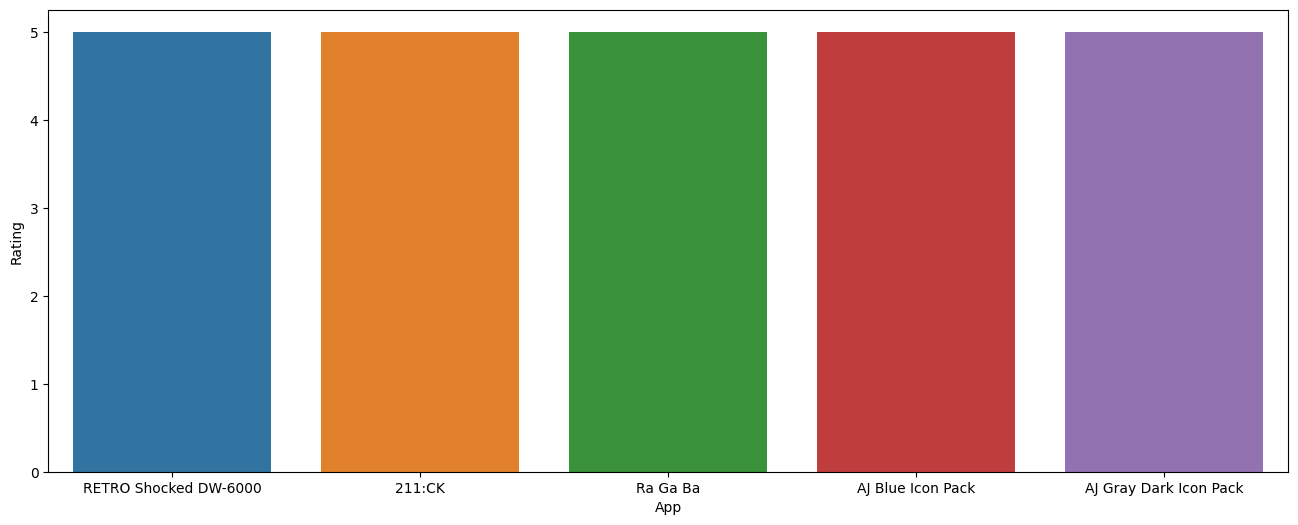

In [77]:
plt.figure(figsize=(16,6))
sns.barplot(data=df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5),x='App',y='Rating')

In [79]:
df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,4-Apr-17,1.2,2.3 and up,0.488281,500.0,low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,11-Apr-18,1.3,4.1 and up,38.000000,38912.0,very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up,20.000000,20480.0,very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,27-Apr-18,1.1,4.1 and up,31.000000,31744.0,low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,29-Apr-18,1.1,4.1 and up,35.000000,35840.0,very low


### top 5 free apps in terms of ratings

<Axes: xlabel='App', ylabel='Rating'>

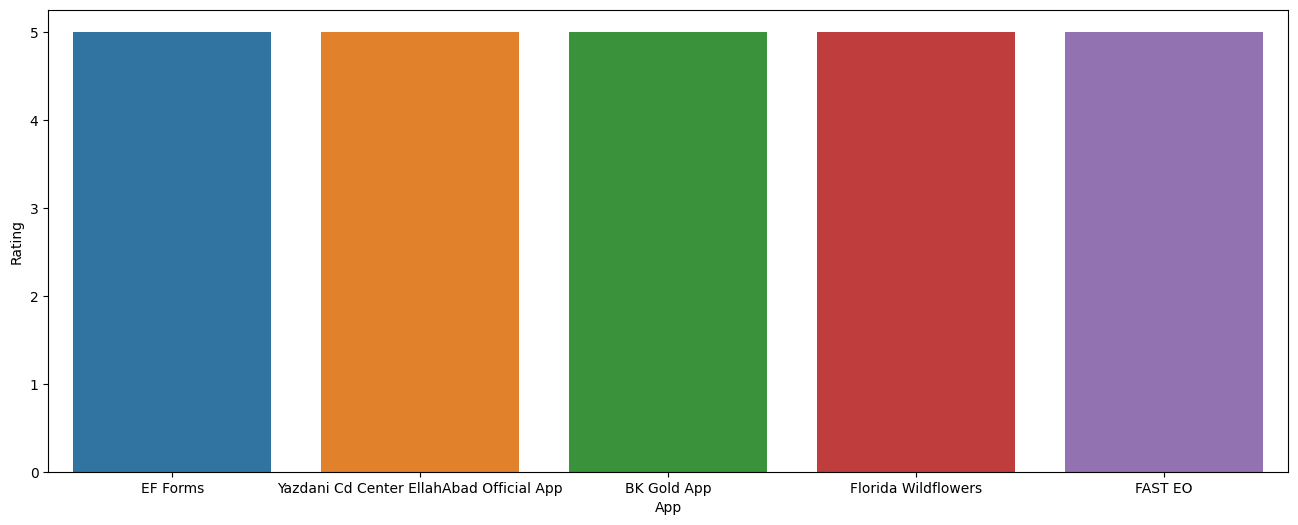

In [80]:
plt.figure(figsize=(16,6))
sns.barplot(data=df[df['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5),x='App',y='Rating')

In [82]:
df[df['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
9290,EF Forms,BUSINESS,5.0,2,24117248.0,50,Free,0.0,Everyone,Business,24-Jul-18,1.29,4.4 and up,23.0,23552.0,low
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3984588.8,500,Free,0.0,Everyone,Entertainment,12-Jan-18,2,4.0 and up,3.8,3891.2,low
6398,BK Gold App,FINANCE,5.0,4,11534336.0,50,Free,0.0,Everyone,Finance,25-May-18,1.0.0,4.4 and up,11.0,11264.0,low
10629,Florida Wildflowers,FAMILY,5.0,5,72351744.0,1000,Free,0.0,Everyone,Education,10-Jul-17,1.5,4.1 and up,69.0,70656.0,low
9659,FAST EO,EVENTS,5.0,1,NaN,10,Free,0.0,Everyone,Events,15-May-18,1.0.3,4.1 and up,NaN,NaN,very low


top 5 free apps in terms of reviews

<Axes: xlabel='App', ylabel='Reviews'>

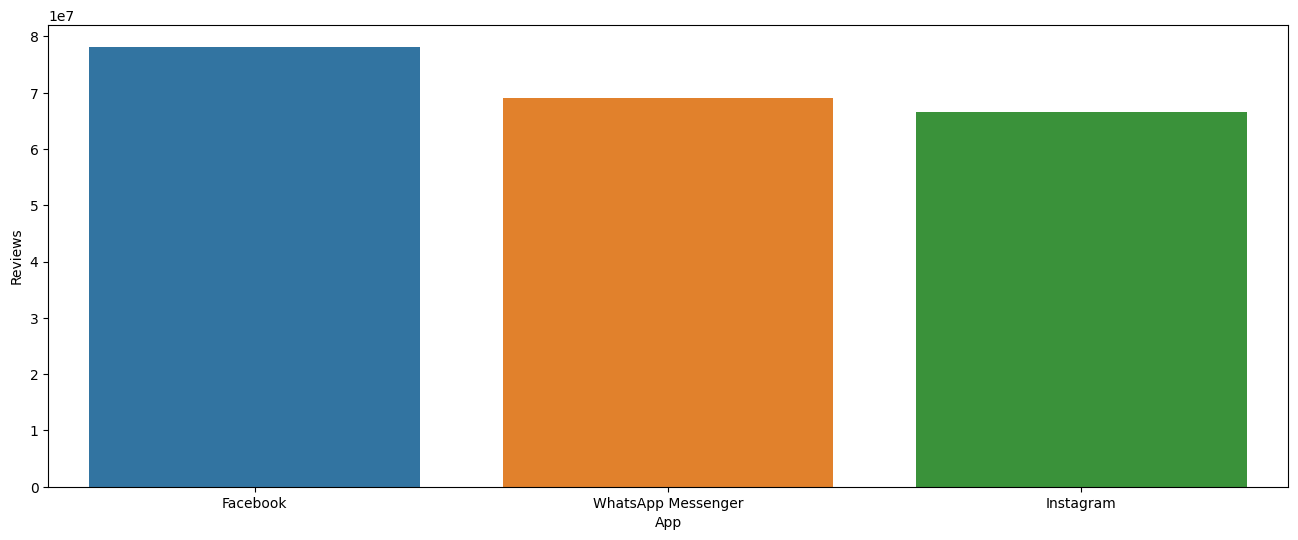

In [83]:
plt.figure(figsize=(16,6))
sns.barplot(data=df[df['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5),x='App',y='Reviews')

In [84]:
df[df['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device,NaN,NaN,top notch


top 5 paid apps in terms of reviews

<Axes: xlabel='App', ylabel='Reviews'>

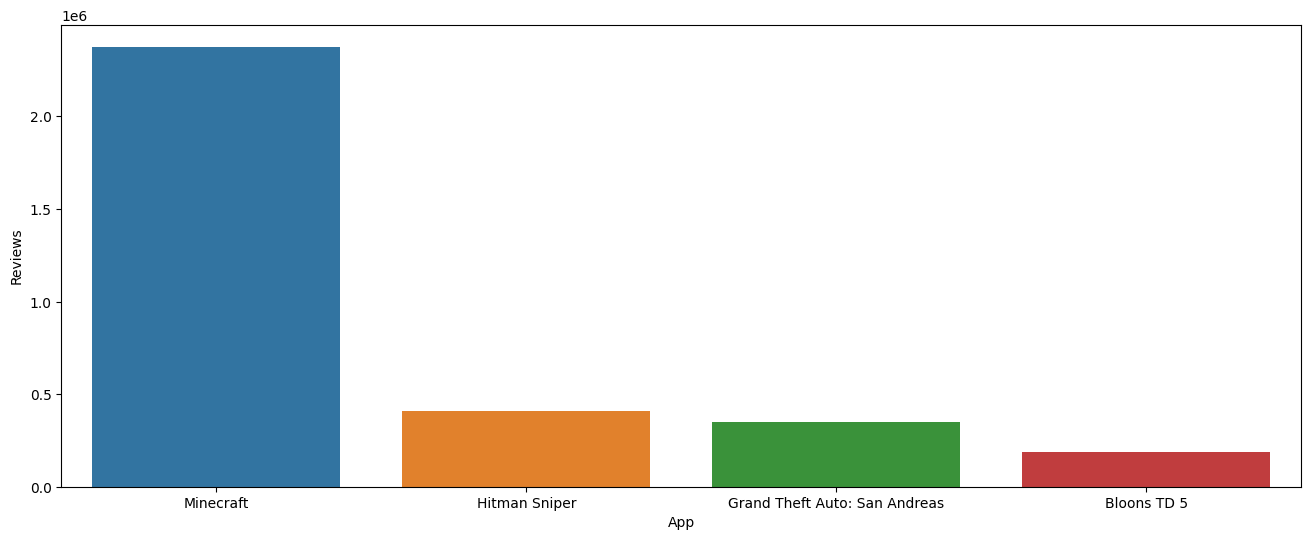

In [85]:
plt.figure(figsize=(16,6))
sns.barplot(data=df[df['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(5),x='App',y='Reviews')

In [86]:
df[df['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device,NaN,NaN,very high
4347,Minecraft,FAMILY,4.5,2375336,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device,NaN,NaN,very high
4034,Hitman Sniper,GAME,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,12-Jul-18,1.7.110758,4.1 and up,29.0,29696.0,very high
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,27262976.0,1000000,Paid,6.99,Mature 17+,Action,21-Mar-15,1.08,3.0 and up,26.0,26624.0,high
8860,Bloons TD 5,FAMILY,4.6,190086,98566144.0,1000000,Paid,2.99,Everyone,Strategy,13-Jul-18,3.16,2.3.3 and up,94.0,96256.0,high


### top notch apps in terms of reviews

In [98]:
df[df['Installs_category']=='top notch'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device,NaN,NaN,top notch


<Axes: xlabel='App', ylabel='Reviews'>

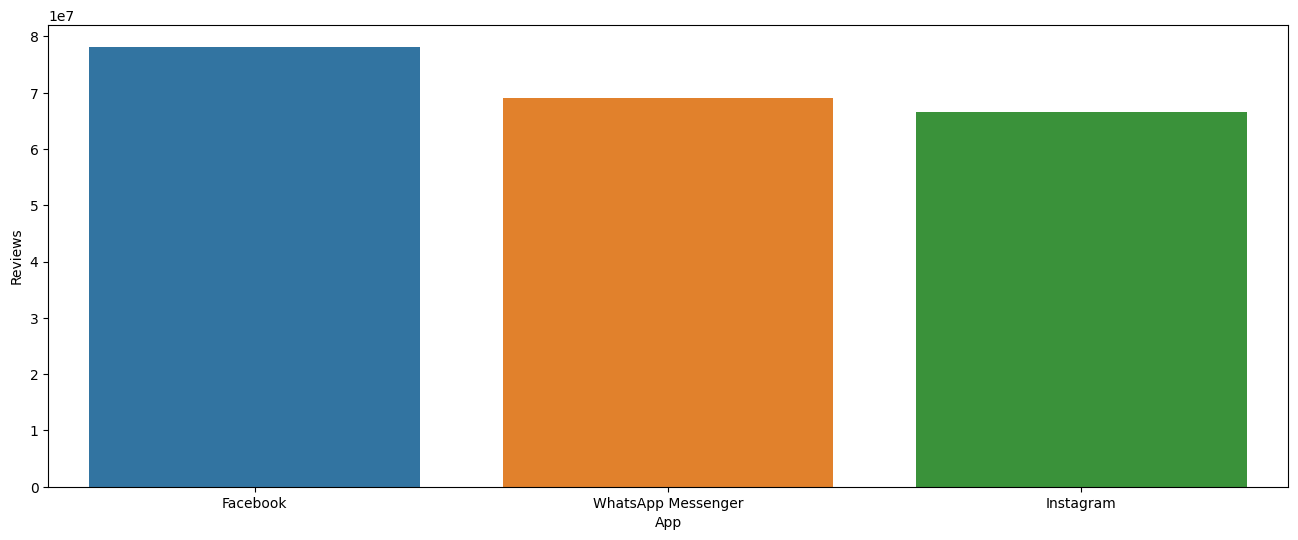

In [101]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Reviews',data=df[df['Installs_category']=='top notch'].sort_values(by='Reviews',ascending=False).head(5))

### top notch apps in terms of rating

In [97]:
df[df['Installs_category']=='top notch'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
1360,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.8,4559407,NaN,100000000,Free,0.0,Everyone,Health & Fitness,1-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
4038,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,10171187.2,50000000,Free,0.0,Everyone,Video Players & Editors,30-Jul-18,1.7.1.3,5.0 and up,9.7,9932.8,top notch
3365,ZenUI Launcher,PERSONALIZATION,4.7,1141545,15728640.0,50000000,Free,0.0,Everyone,Personalization,31-Jul-18,Varies with device,Varies with device,15.0,15360.0,top notch
3941,Bible,BOOKS_AND_REFERENCE,4.7,2440695,NaN,100000000,Free,0.0,Teen,Books & Reference,2-Aug-18,Varies with device,Varies with device,NaN,NaN,top notch
1720,Bowmasters,GAME,4.7,1534466,NaN,50000000,Free,0.0,Teen,Action,23-Jul-18,2.12.5,4.1 and up,NaN,NaN,top notch


<Axes: xlabel='App', ylabel='Rating'>

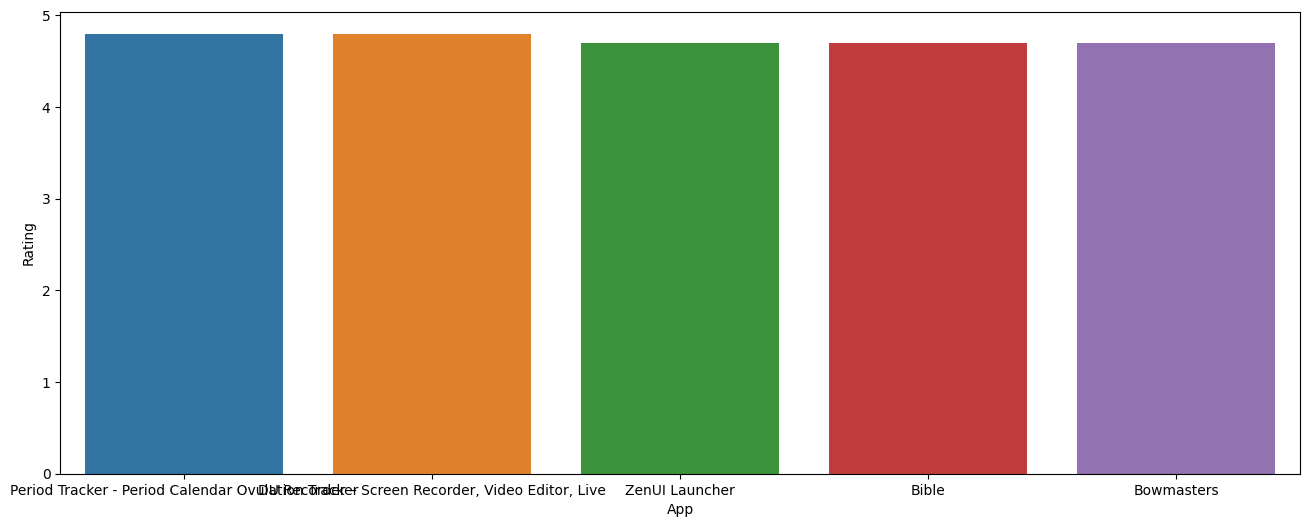

In [104]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Installs_category']=='top notch'].sort_values(by='Rating',ascending=False).head())

### very low install category in terms of reviews

In [105]:
df[df['Installs_category']=='very low'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
8591,DN Blog,SOCIAL,5.0,20,4404019.2,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up,4.2,4300.8,very low
9096,DZ Puzzle,FAMILY,NaN,14,49283072.0,10,Paid,0.99,Everyone,Puzzle,22-Apr-17,1.2,2.3 and up,47.0,48128.0,very low
7402,Trovami se ci riesci,GAME,5.0,11,6396313.6,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up,6.1,6246.4,very low
6508,Sam.BN Pro,TOOLS,NaN,11,2097152.0,10,Paid,0.99,Everyone,Tools,27-Mar-15,1.0.0,4.0.3 and up,2.0,2048.0,very low
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4194304.0,10,Free,0.00,Everyone,Health & Fitness,13-Jun-18,3.55,4.0 and up,4.0,4096.0,very low


<Axes: xlabel='App', ylabel='Rating'>

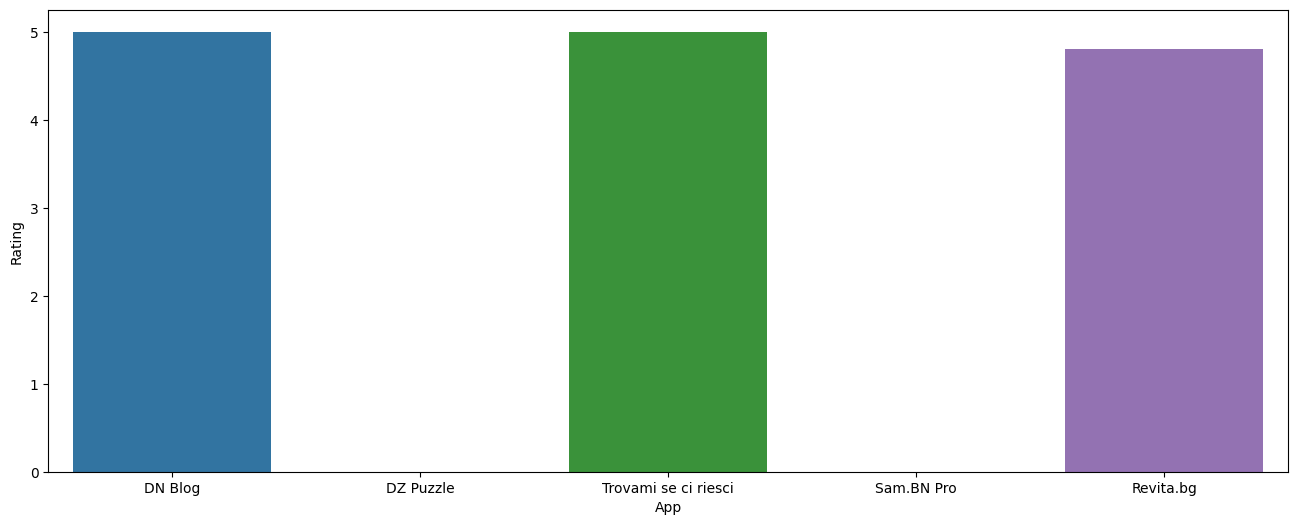

In [106]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Installs_category']=='very low'].sort_values(by='Reviews',ascending=False).head())

### very low install category in terms of rating

In [107]:
df[df['Installs_category']=='very low'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB,Installs_category
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,48234496.0,10,Paid,0.99,Everyone,Personalization,21-May-18,1.1,4.1 and up,46.0,47104.0,very low
7482,Tic Tac CK,FAMILY,5.0,3,13631488.0,10,Free,0.00,Everyone,Puzzle,3-Jul-18,1,4.0.3 and up,13.0,13312.0,very low
8335,DF Glue Board,PARENTING,5.0,1,28311552.0,10,Free,0.00,Everyone,Parenting,19-Jan-18,Glueboardv.6,4.2 and up,27.0,27648.0,very low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,29-May-16,1.2,2.3 and up,1.2,1228.8,very low
8159,CZ Kompas,TOOLS,5.0,2,3670016.0,10,Free,0.00,Everyone,Tools,9-Jul-18,1.1,4.0 and up,3.5,3584.0,very low


<Axes: xlabel='App', ylabel='Rating'>

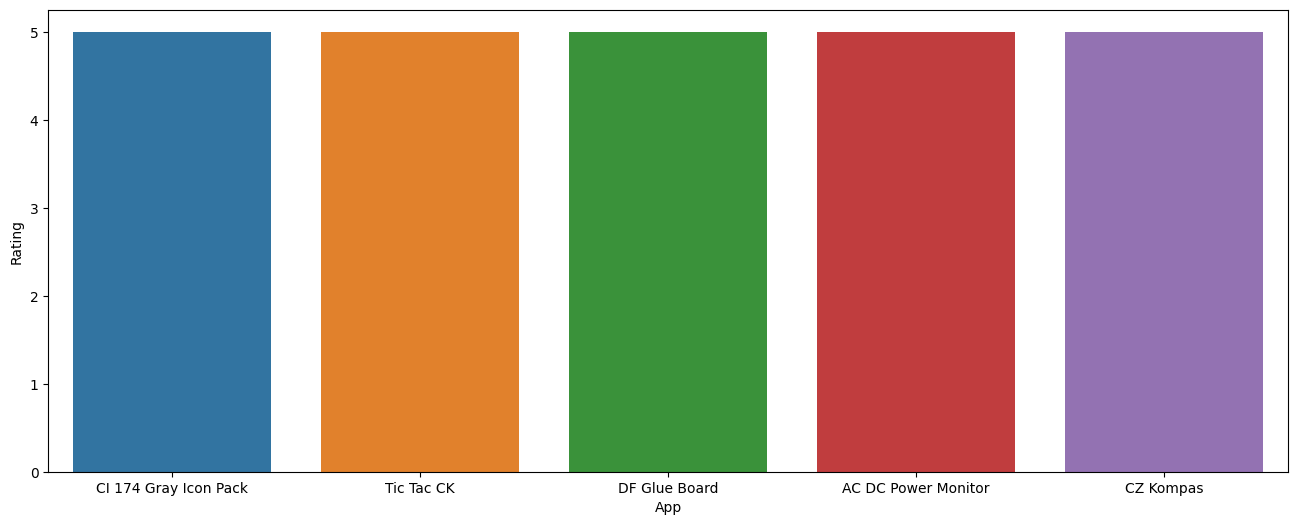

In [108]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Installs_category']=='very low'].sort_values(by='Rating',ascending=False).head())

### install category vs size in KB

<Axes: xlabel='Installs_category', ylabel='Size_in_KB'>

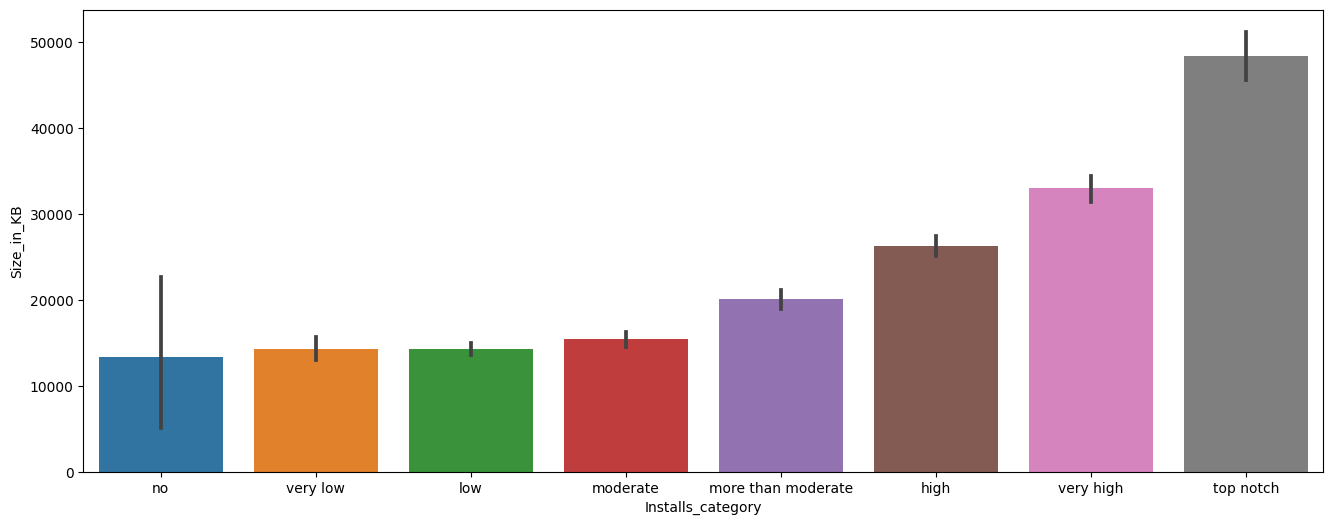

In [111]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Installs_category',y='Size_in_KB')

### install category size in bytes

<Axes: xlabel='Installs_category', ylabel='Size_in_bytes'>

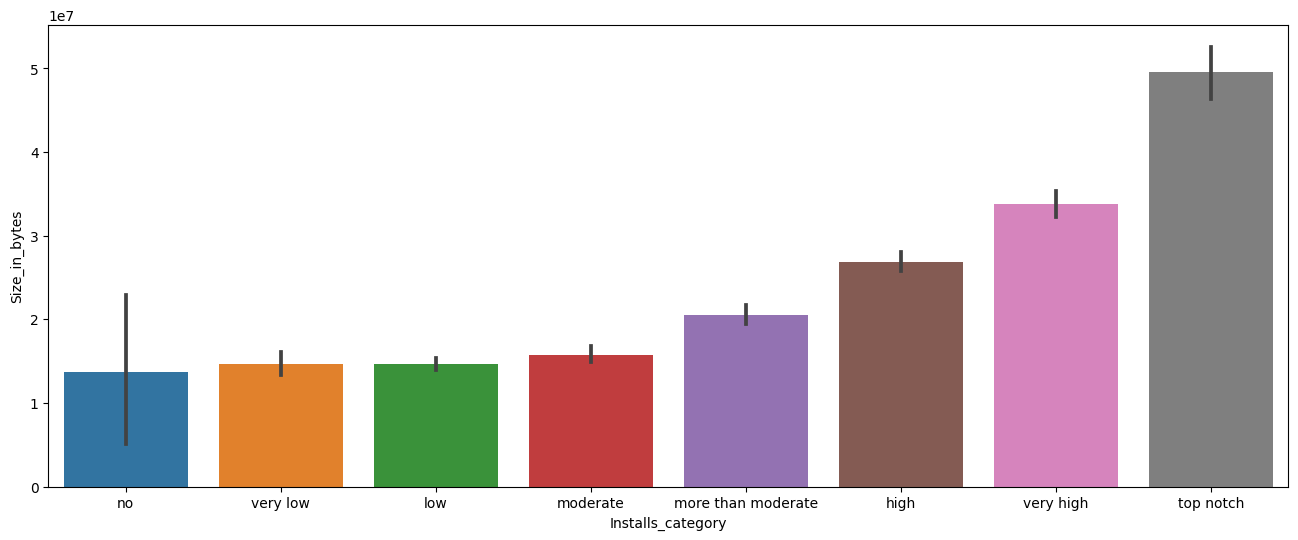

In [112]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Installs_category',y='Size_in_bytes')

### top 5 apps having highest reviews

In [115]:
df.groupby('App')['Reviews'].value_counts().sort_values(ascending=False).head(5)

App                          Reviews
YouTube Gaming               130549     2
Dog Run - Pet Dog Simulator  48615      2
Target - now with Cartwheel  68406      2
ROBLOX                       4449910    2
Learn C++                    73404      2
Name: count, dtype: int64

### top 5 apps with highest rating

In [116]:
df.groupby('App')['Rating'].value_counts().sort_values(ascending=False).head(5)

App              Rating
ROBLOX           4.5       9
8 Ball Pool      4.5       7
Zombie Catchers  4.7       6
Helix Jump       4.2       6
Temple Run 2     4.3       5
Name: count, dtype: int64

### top 5 apps with highest no of installs

In [121]:
df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(5)

App
Subway Surfers                  5000000000
Hangouts                        4000000000
Google Photos                   4000000000
Google Chrome: Fast & Secure    3000000000
Google Drive                    3000000000
Name: Installs, dtype: int64

In [130]:
df.groupby('App')['Price'].sum().sort_values(ascending=False).head(5)

App
I'm Rich - Trump Edition          400.00
I am rich (Most expensive app)    399.99
I am Rich Plus                    399.99
most expensive app (H)            399.99
I AM RICH PRO PLUS                399.99
Name: Price, dtype: float64